In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import helper scripts

In [2]:
import eGrid

# Electrode orientation with respect to stimulation and references 

This simulation is in 2D, and simulates what voltages should be on electrode contacts depending on their orientation to the stimulation field. There are 3 different electrode contact orientations currently programmed: "flat" which is straight across with reference to the stimulation, "slanted" which looks more similar to the more superior electrode strop and "superslanted" which is more similar to the more inferior strip; 

<IPython.core.display.Javascript object>


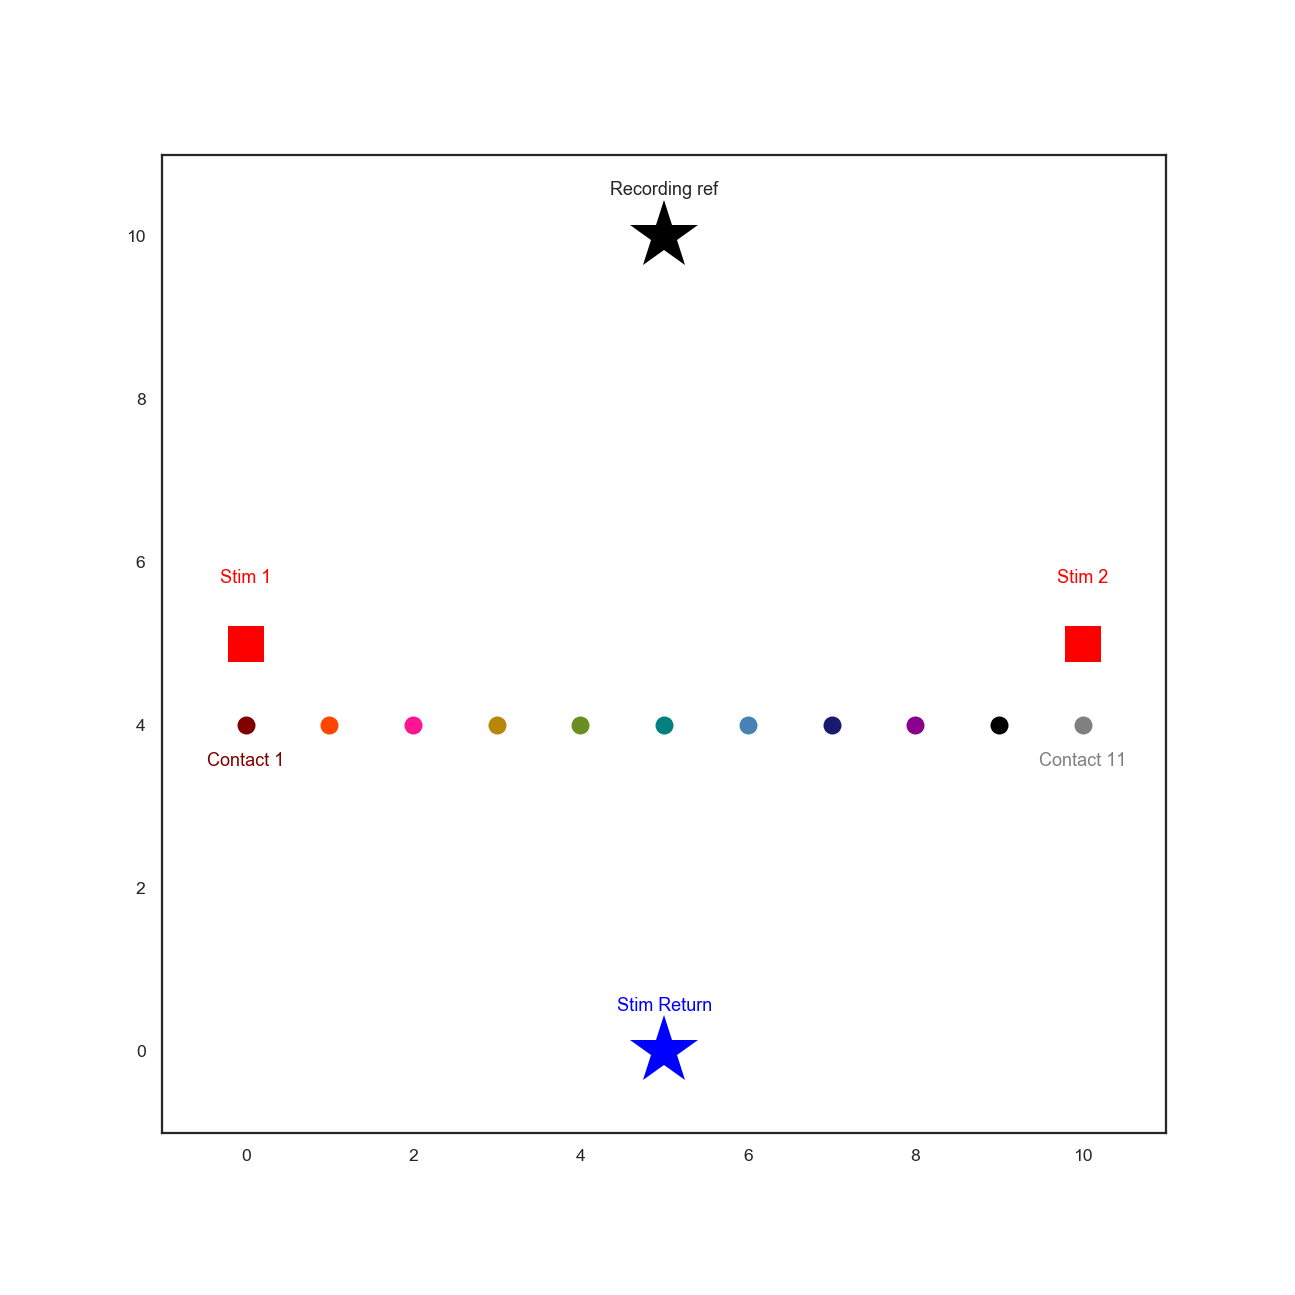

In [11]:
### Options for eGrd: 
### Grid_options: 'flat', 'slanted', 'superslanted'
experiment = eGrid.eGrid(grid_option='flat')
experiment.plot()

# Voltages during stimulation on Stim1 and Stim2

Recreating Opitz paper, Fig. 2A-B for different orientations. Included the "flat" orientation for intuition as to what should be happening. Note that in the voltage plots, signals are time shifted a tiny bit (1-2 ms) with reference to one another so that contacts which the exact same voltages will both be visible; Voltage plots for phase differences of 0, 90, 180, and 270 are shown. Each time series corresponds to the voltage of the contact of that same color. 

<IPython.core.display.Javascript object>


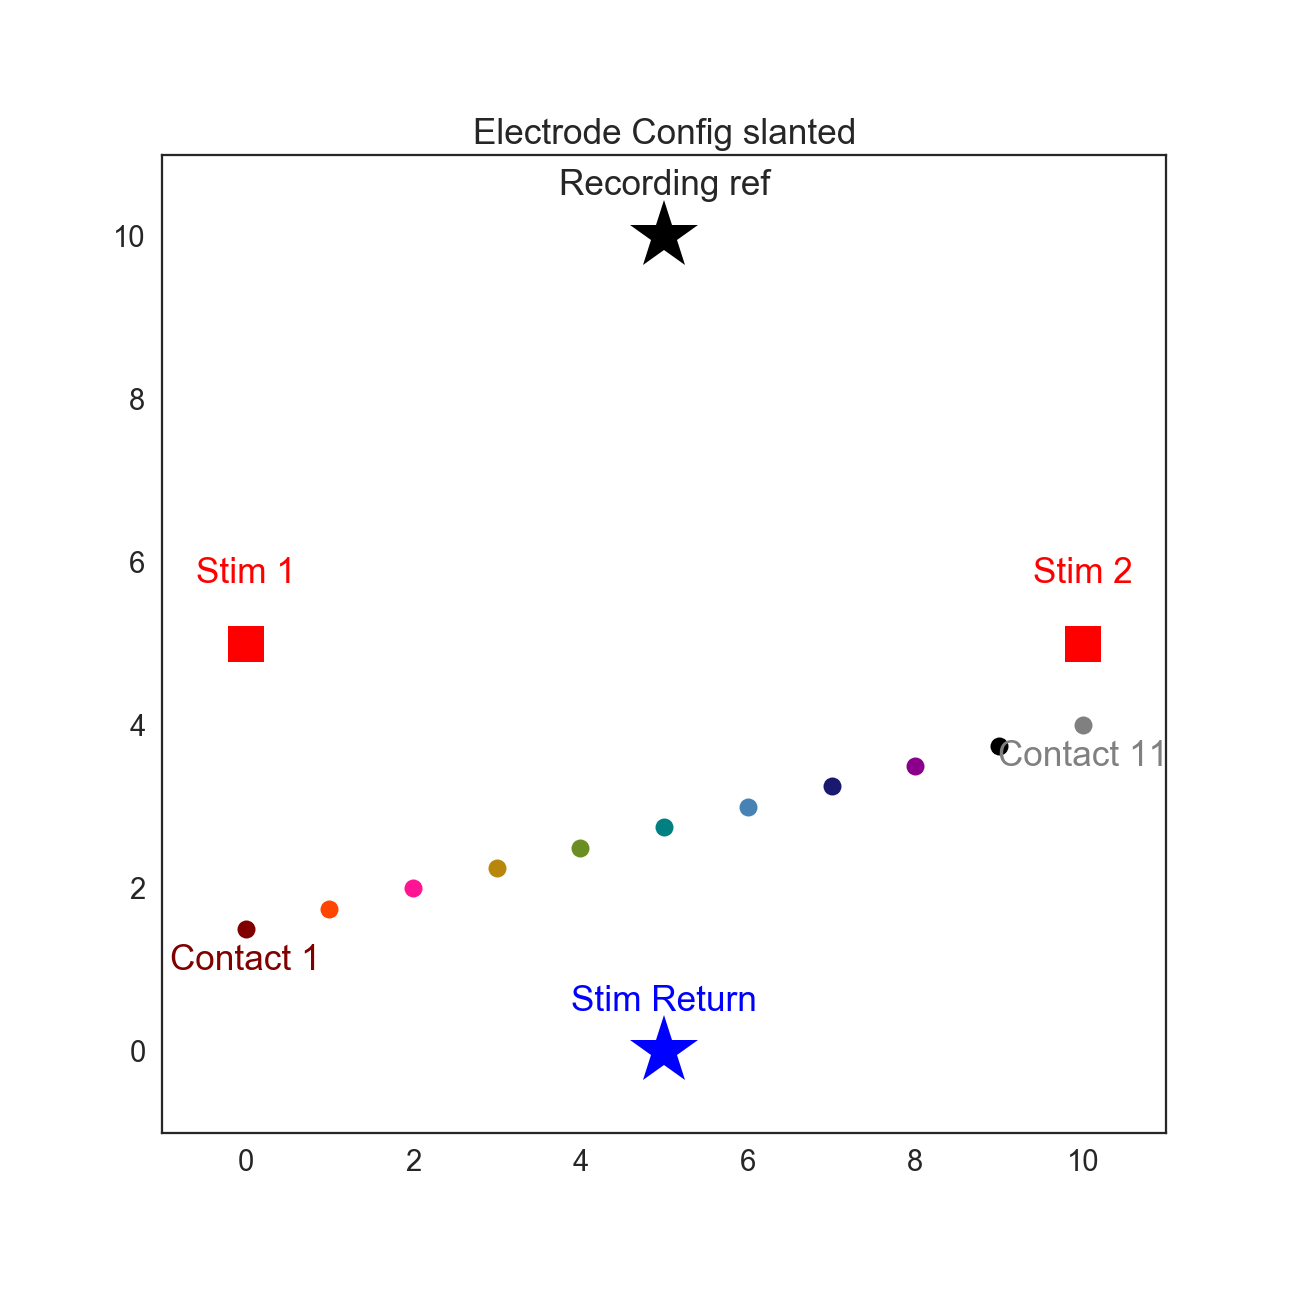

<IPython.core.display.Javascript object>


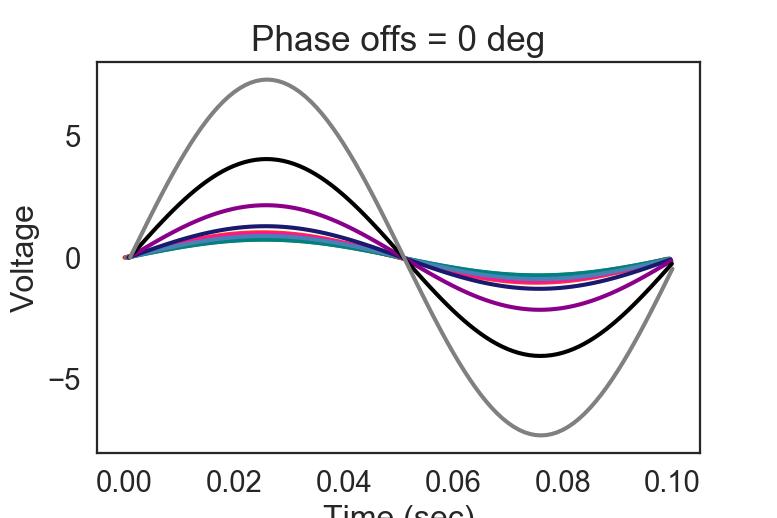

<IPython.core.display.Javascript object>


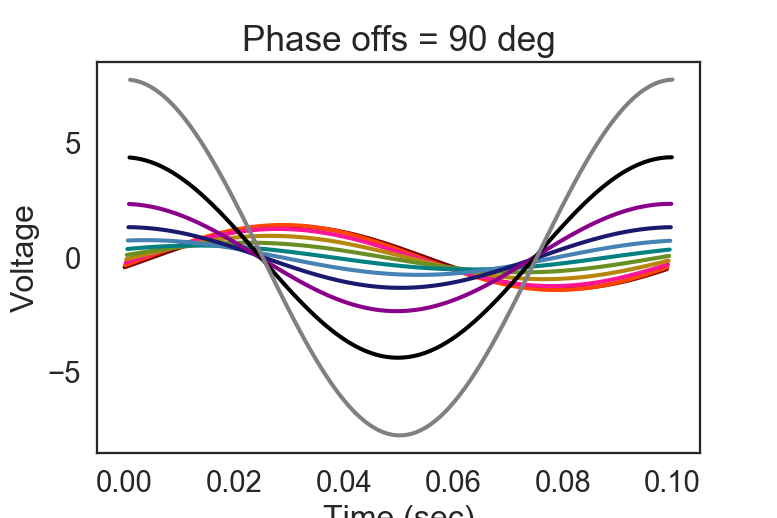

<IPython.core.display.Javascript object>


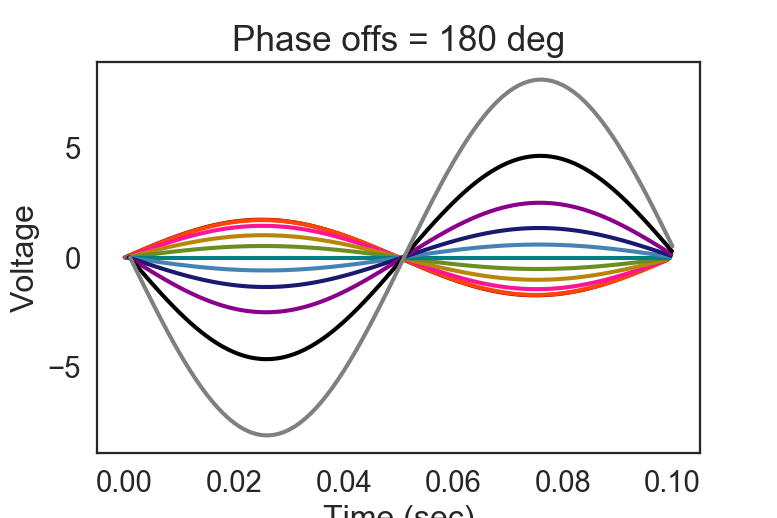

Argmax 180 10


<IPython.core.display.Javascript object>


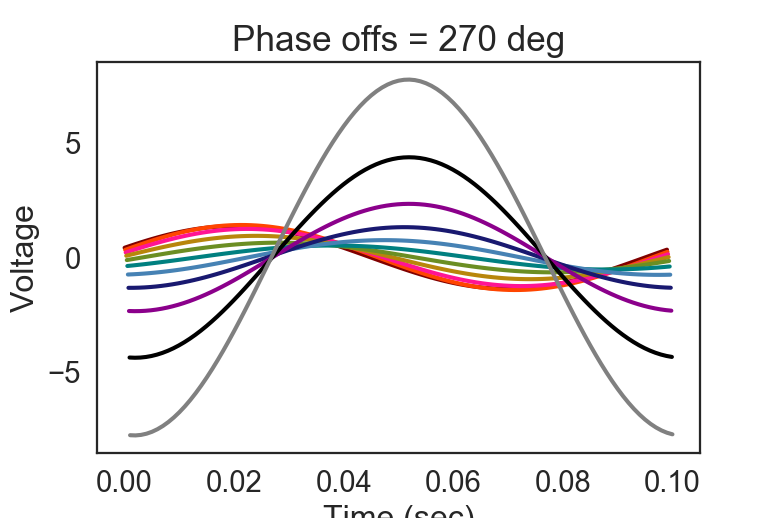

<IPython.core.display.Javascript object>


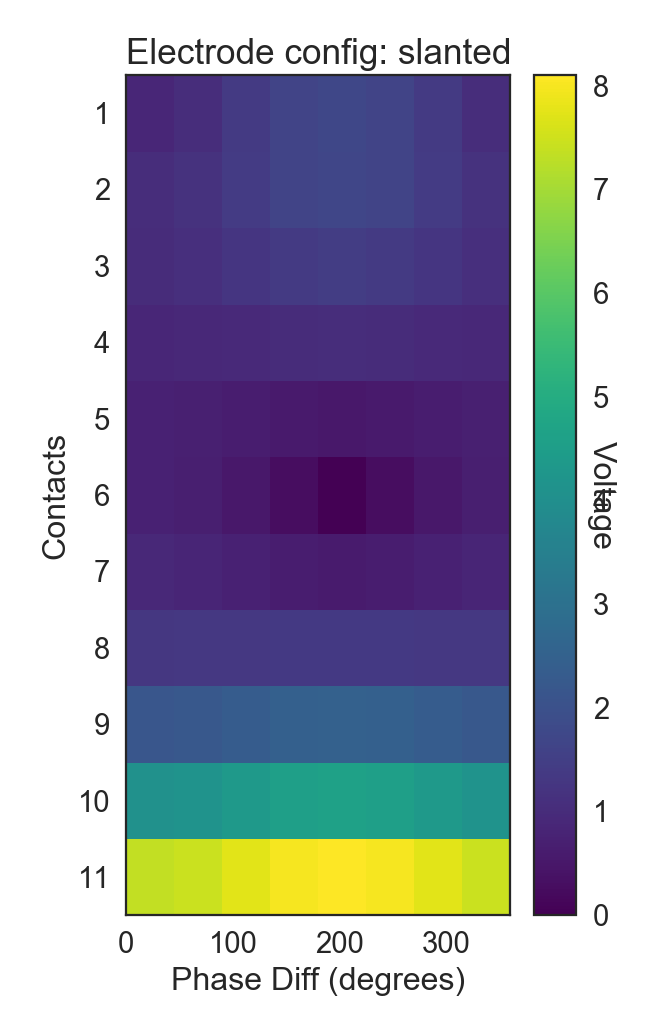

In [56]:
#eGrid.opitz_fig2('flat')
eGrid.opitz_fig2('slanted')

# Sum of sines at phase offsets: Resultant phase depends on amplitude of each sine: 

In [3]:
### Sum of 2 sines of different amplitudes ####
from ipywidgets import *
import numpy as np 
import matplotlib.pyplot as plt

This is a simple widget to show that when you add together 2 sines that are at a different phase offset, the resultant sine will depend fully on the amplitudes of each of the sum sines. Since electrodes are at different points in space, and space defines magnitude of E1 vs. E2 voltages experienced, different points in space must have different phases. The only exception is when phases are fully aligned; 

<IPython.core.display.Javascript object>


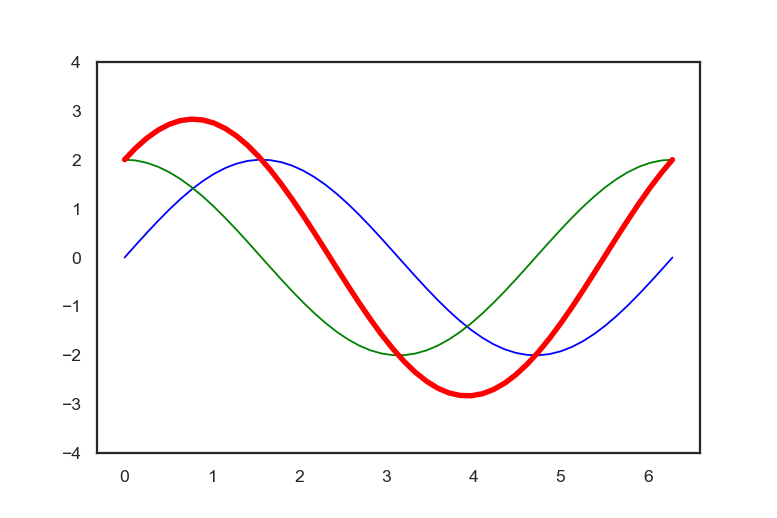

interactive(children=(FloatSlider(value=1.0, description=u'amp1', max=2.0), FloatSlider(value=1.0, description…

<function __main__.update>

In [5]:
rads = np.linspace(0, 2*np.pi)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(-4, 4)
amp1 = 1.
amp2 = 1.
phase_diff = 0. #degrees  

line1, = ax.plot(rads, amp1*np.sin(rads), 'b-', linewidth=1)
line2, = ax.plot(rads, amp2*np.sin(rads + phase_diff/180.*np.pi), 'g-', linewidth=1)
line3, = ax.plot(rads, amp1*np.sin(rads) + amp2*np.sin(rads + phase_diff/180.*np.pi), 
               'r-', linewidth=3)

def update(amp1=widgets.FloatSlider(min=0, max=2, value=1),
           amp2=widgets.FloatSlider(min=0, max=2, value=1), 
           phase_diff=widgets.IntSlider(min=0, max=180, step=10, value=0)):
    '''
    update with new values
    '''
    line1.set_ydata(amp1*np.sin(rads))
    line2.set_ydata(amp2*np.sin(rads + phase_diff/180.*np.pi))
    line3.set_ydata(amp1*np.sin(rads) + amp2*np.sin(rads + phase_diff/180.*np.pi))
    fig.canvas.draw()

### Run the updated 
interact(update)
    